For the purpose to give more stability in our modeling we are going to try to normalise the data applying Logaritmical transformation

##### Logaritmical transformation to normalise the data

Result for cigsPerDay after logarithmic transformation:
Statistical Test: 0.7599417567253113
P-Value: 0.0
Result for totChol after logarithmic transformation:
Statistical Test: 0.9968982338905334
P-Value: 1.1638425689852738e-07
Result for sysBP after logarithmic transformation:
Statistical Test: 0.9786430597305298
P-Value: 9.205942668980659e-25
Result for diaBP after logarithmic transformation:
Statistical Test: 0.995639979839325
P-Value: 6.812700958924722e-10
Result for BMI after logarithmic transformation:
Statistical Test: 0.9920635223388672
P-Value: 1.2361227831798362e-14
Result for heartRate after logarithmic transformation:
Statistical Test: 0.9943292140960693
P-Value: 7.602335427847606e-12
Result for glucose after logarithmic transformation:
Statistical Test: 0.8403283953666687
P-Value: 0.0


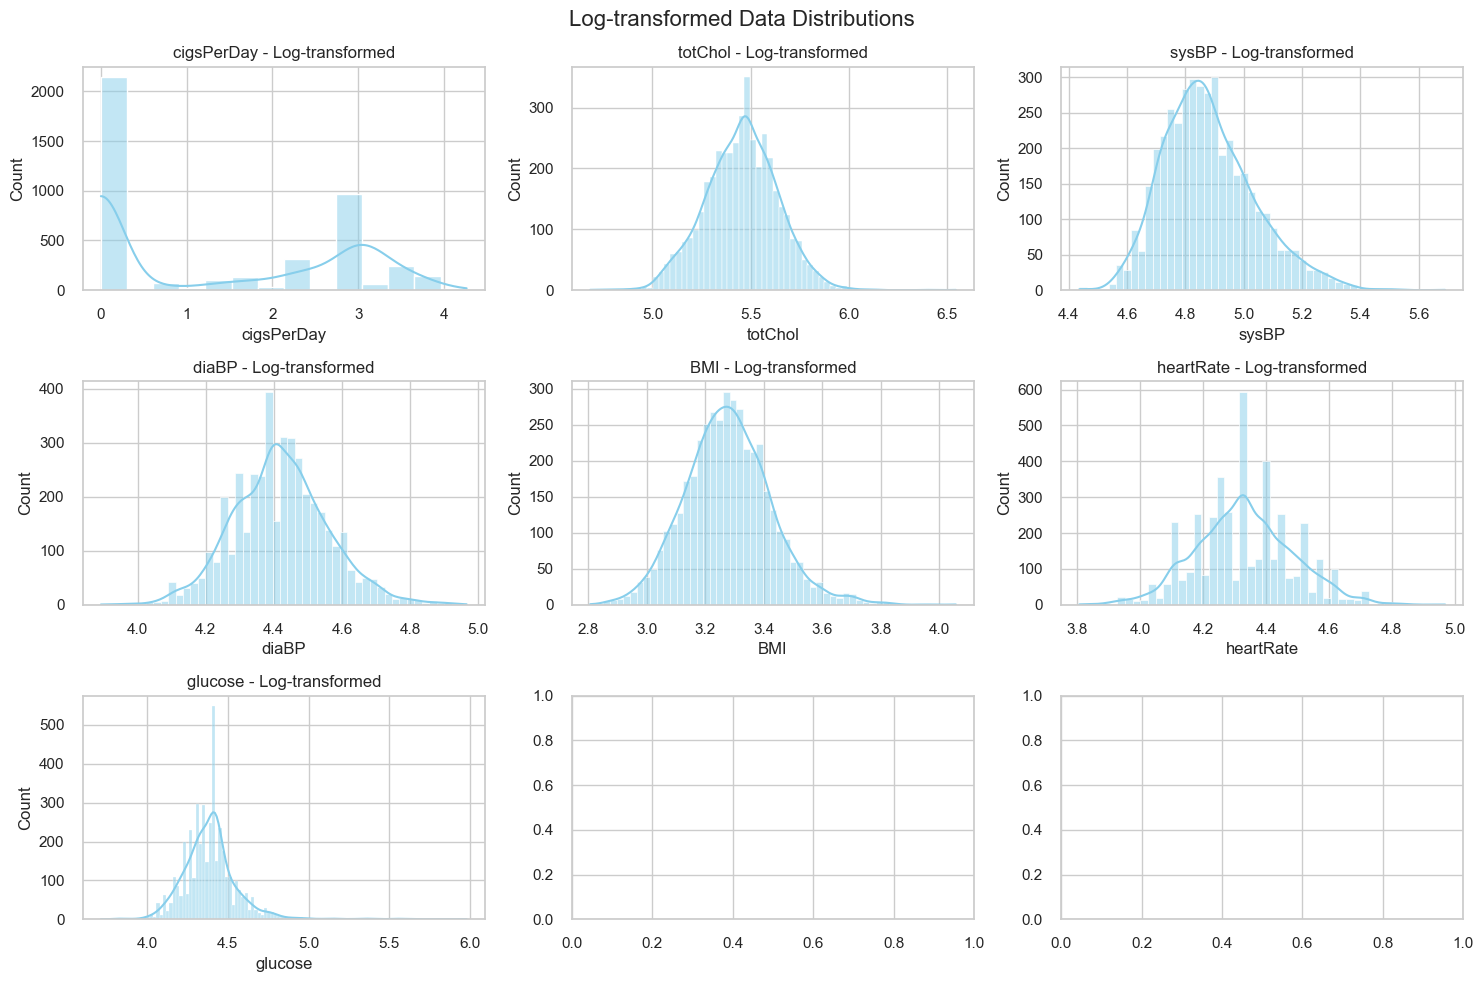

In [43]:
# List of continuous variables
continuous_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Apply logarithmic transformation for each variable
for column in continuous_columns:
    df[f'{column}_log'] = np.log1p(df[column])  

# Check normality 
for column in continuous_columns:
    # Result after log
    result_log = shapiro(df[f'{column}_log'])
    print(f"Result for {column} after logarithmic transformation:")
    print(f"Statistical Test: {result_log.statistic}")
    print(f"P-Value: {result_log.pvalue}")
    
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Log-transformed Data Distributions', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(continuous_columns):
    # Apply log transformation (adding 1 to avoid log(0))
    transformed_data = np.log1p(df[column])
    
    # Plot the histogram
    sns.histplot(transformed_data, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column} - Log-transformed')

# Adjust layout
plt.tight_layout()
plt.show()

Log transformations were applied, and it was found that the data was not normal. Since these transformations did not achieve the desired normal distribution, we plan to utilize MinMaxScaler. MinMaxScaler will scaling the data put it to a range between 0 and 1. It is usufull for adjust the data but not necessary normalise them. This step is taken to prepare the data for algorithms that are sensitive to feature scales

#### _____________________________________________________________________________________________________________